### import all the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Pass the warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore')


### Read the dataset and store it into pandas dataframe:

In [3]:
df = pd.read_csv('dft-road-casualty-statistics-accident-2021.csv', low_memory=False)

# Exploratory Data Analysis:

### Displayt the shape of the dataset:

In [4]:
df.shape

(101087, 36)

### Display the data types of all columns in the data frame:

In [5]:
df.dtypes

accident_index                                  object
accident_year                                    int64
accident_reference                              object
location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
local_authority_ons_district                    object
local_authority_highway                         object
first_road_class                                 int64
first_road

### Display the column names in the data frame:

In [6]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

### display the general information about the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101087 entries, 0 to 101086
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               101087 non-null  object 
 1   accident_year                                101087 non-null  int64  
 2   accident_reference                           101087 non-null  object 
 3   location_easting_osgr                        101070 non-null  float64
 4   location_northing_osgr                       101070 non-null  float64
 5   longitude                                    101070 non-null  float64
 6   latitude                                     101070 non-null  float64
 7   police_force                                 101087 non-null  int64  
 8   accident_severity                            101087 non-null  int64  
 9   number_of_vehicles                           101087 non-nul

### Print the first 10 rows of the dataset:

In [8]:
df.head(10)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010287148,2021,010287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010287149,2021,010287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010287151,2021,010287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010287155,2021,010287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010287157,2021,010287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608
5,2021010287163,2021,010287163,536569.0,183334.0,-0.032448,51.532404,1,2,2,...,4,4,1,1,0,0,1,1,2,E01004228
6,2021010287167,2021,010287167,531818.0,188393.0,-0.099009,51.578996,1,3,2,...,0,1,9,1,0,0,1,1,2,E01002047
7,2021010287168,2021,010287168,541068.0,190017.0,0.035049,51.591350,1,3,2,...,8,1,8,2,0,0,1,1,2,E01003764
8,2021010287185,2021,010287185,530553.0,162637.0,-0.126757,51.347826,1,2,1,...,0,1,1,1,0,0,1,1,2,E01004085
9,2021010287189,2021,010287189,543401.0,186128.0,0.067118,51.555817,1,3,2,...,9,7,9,9,9,9,1,3,2,E01003728


### Convert date into pandas datetime object:

In [9]:
df['date'] = pd.to_datetime(df['date'],)

### Extract day, month and week some useful features from 'date' column:

In [10]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

### accident_severity is out target variable, display the unique values in accident_severity column:

### 1 = Satal, 2= Serious and 3 = Slight

In [11]:
df['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

### display the value count for the accident_severity (target) variable:

In [12]:
df['accident_severity'].value_counts()

3    78329
2    21284
1     1474
Name: accident_severity, dtype: int64

# Univariate Analysis:

### Distribution of original data by target (accident_severity):

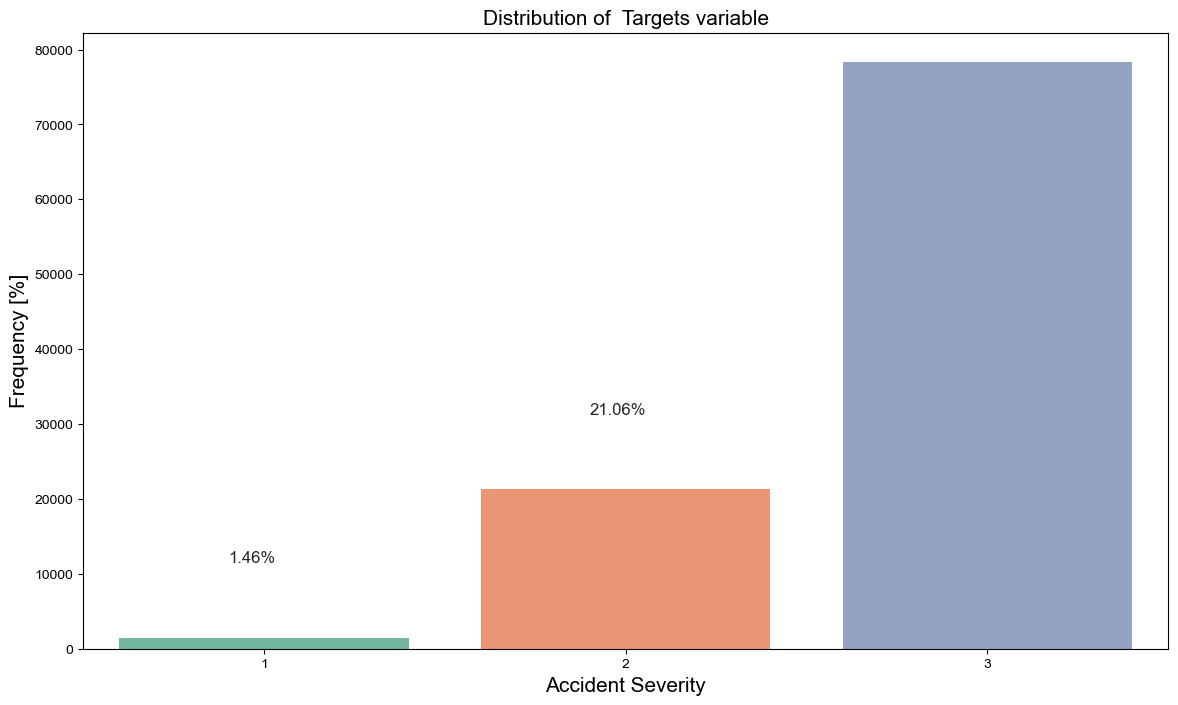

In [13]:
ax = sns.countplot(x = df.accident_severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(14,8)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.accident_severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of  Targets variable',fontsize = 15)
plt.xlabel('Accident Severity',fontsize = 15)
plt.ylabel('Frequency [%]',fontsize = 15)
plt.show()

### Number of casualties distribution

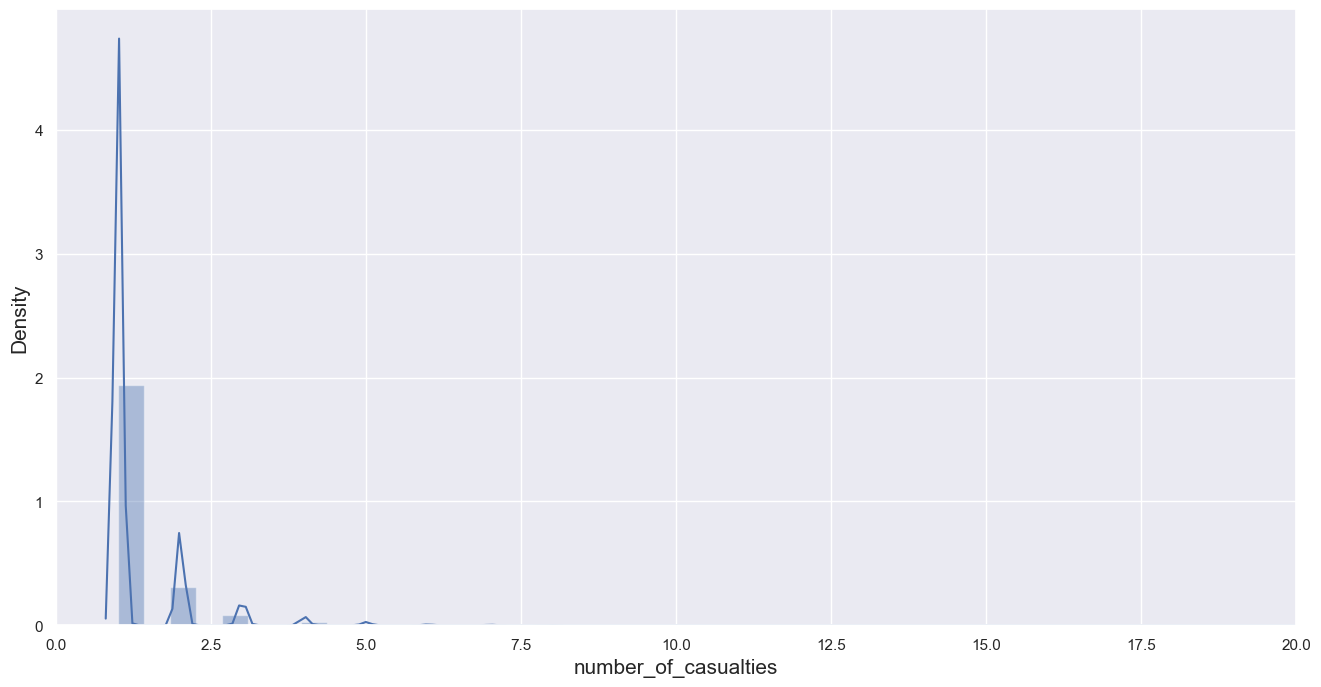

Min: 1 
Max: 22 
Median: 1.0


In [14]:
plt.figure(figsize=(16,8))
sns.distplot(df.number_of_casualties).set_xlim(0,20)
plt.xlabel('number_of_casualties' ,fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()
print('Min:',    df.number_of_casualties.min(), '\n'
      'Max:',    df.number_of_casualties.max(), '\n'
      'Median:', df.number_of_casualties.median())

### Distribution of accidents over the day

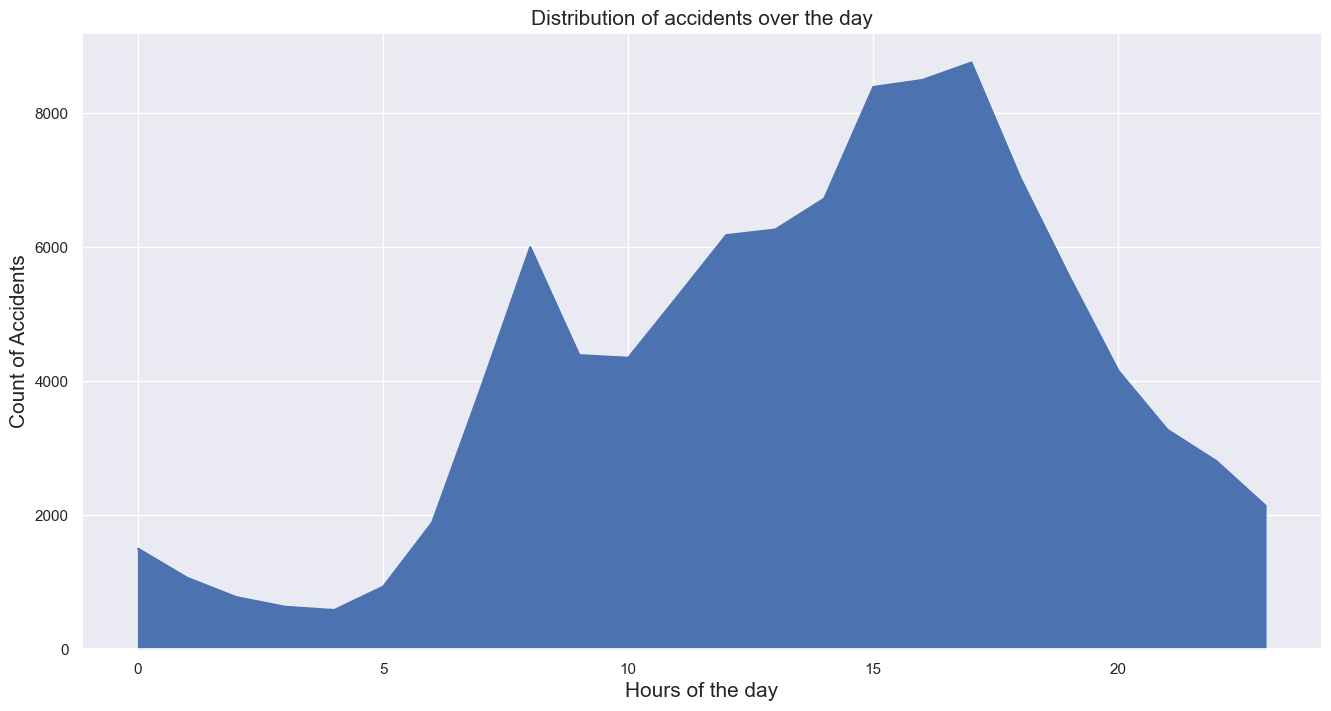

In [15]:
time_x = pd.to_datetime(df['time'], format='%H:%M').dt.hour
plt.figure(figsize=(16,8))
ax = time_x.value_counts().sort_index().plot(kind = 'area')
ax.set_xlabel('Hours of the day', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents over the day', fontsize = 15)
plt.show()

### Number of vehicles distribution

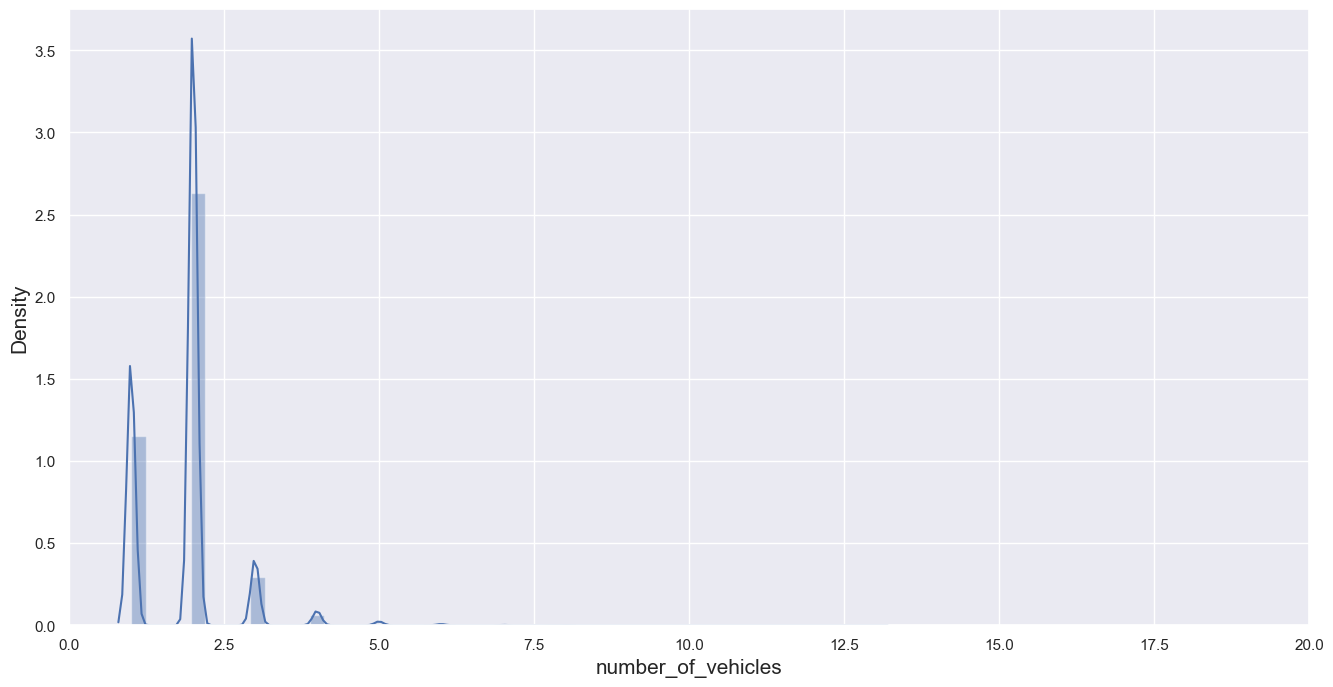

Min: 1 
Max: 13 
Median: 2.0


In [16]:
plt.figure(figsize=(16,8))
sns.distplot(df.number_of_vehicles).set_xlim(0,20)
plt.xlabel('number_of_vehicles',fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()
print('Min:',    df.number_of_vehicles.min(), '\n'
      'Max:',    df.number_of_vehicles.max(), '\n'
      'Median:', df.number_of_vehicles.median())

### A boxplot to show Distribution of Speed Limit:

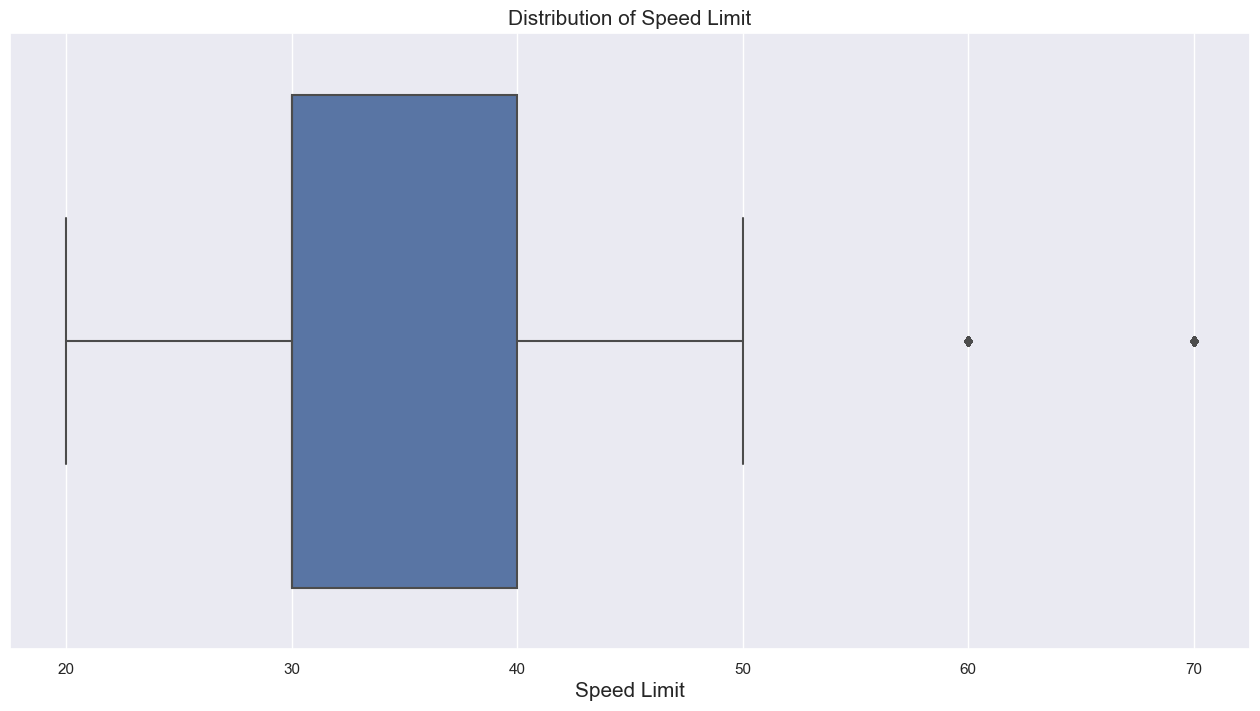

In [17]:
import seaborn as sns
plt.figure(figsize = (16, 8))
sns.boxplot(x=df["speed_limit"])
plt.title("Distribution of Speed Limit",fontsize = 15)
plt.xlabel("Speed Limit",fontsize = 15)
plt.show()


### Bar chart of "day_of_week"

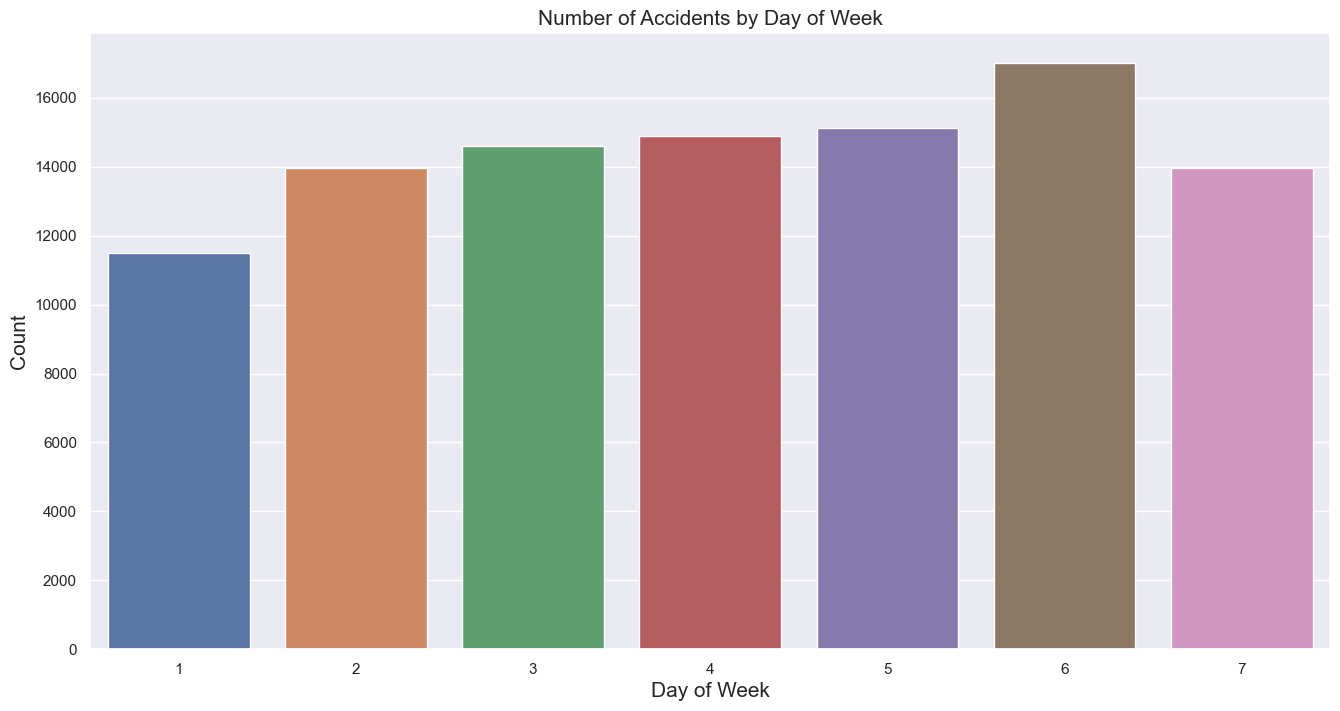

In [18]:
plt.figure(figsize = (16, 8))
sns.countplot(x=df["day_of_week"])
plt.title("Number of Accidents by Day of Week",fontsize = 15)
plt.xlabel("Day of Week",fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.show()

# Multivariate Analysis:

### Scatter plot of "speed_limit" vs "number_of_casualties"

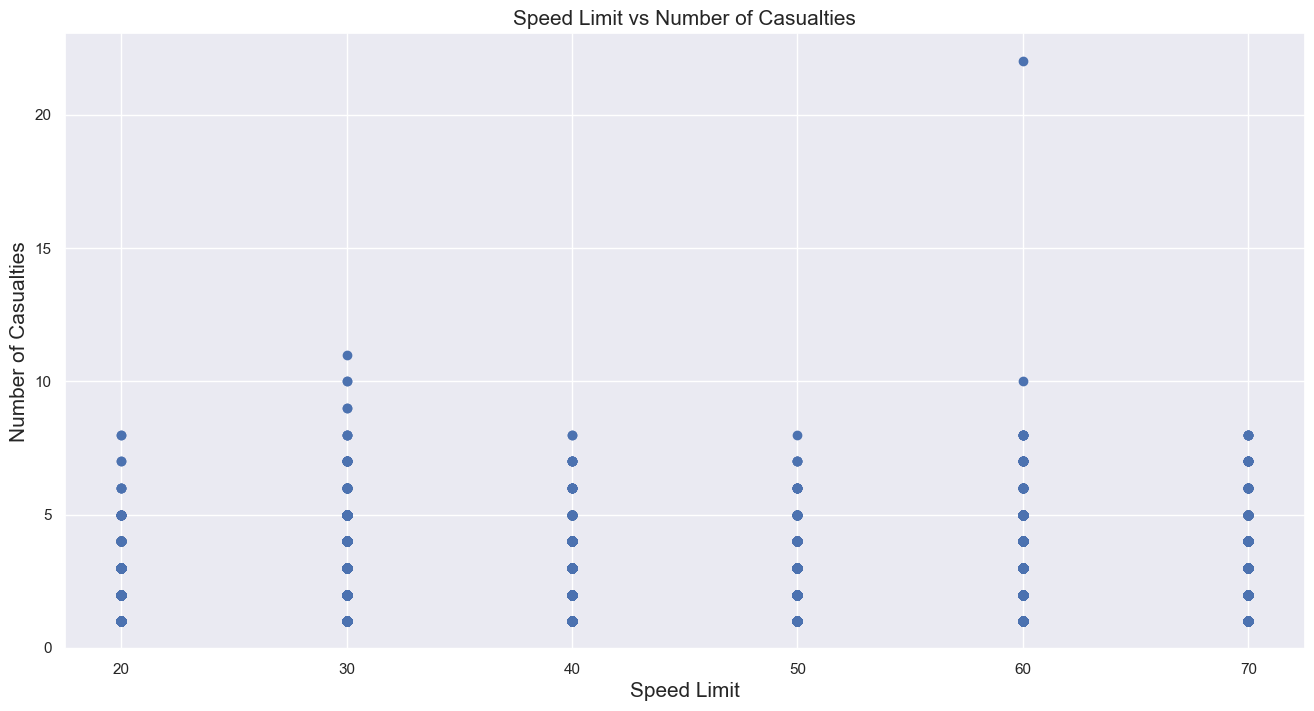

In [19]:
plt.figure(figsize = (16, 8))
plt.scatter(x=df["speed_limit"], y=df["number_of_casualties"])
plt.title("Speed Limit vs Number of Casualties",fontsize = 15)
plt.xlabel("Speed Limit",fontsize = 15)
plt.ylabel("Number of Casualties",fontsize = 15)
plt.show()


### Box plot of "speed_limit" by "weather_conditions"

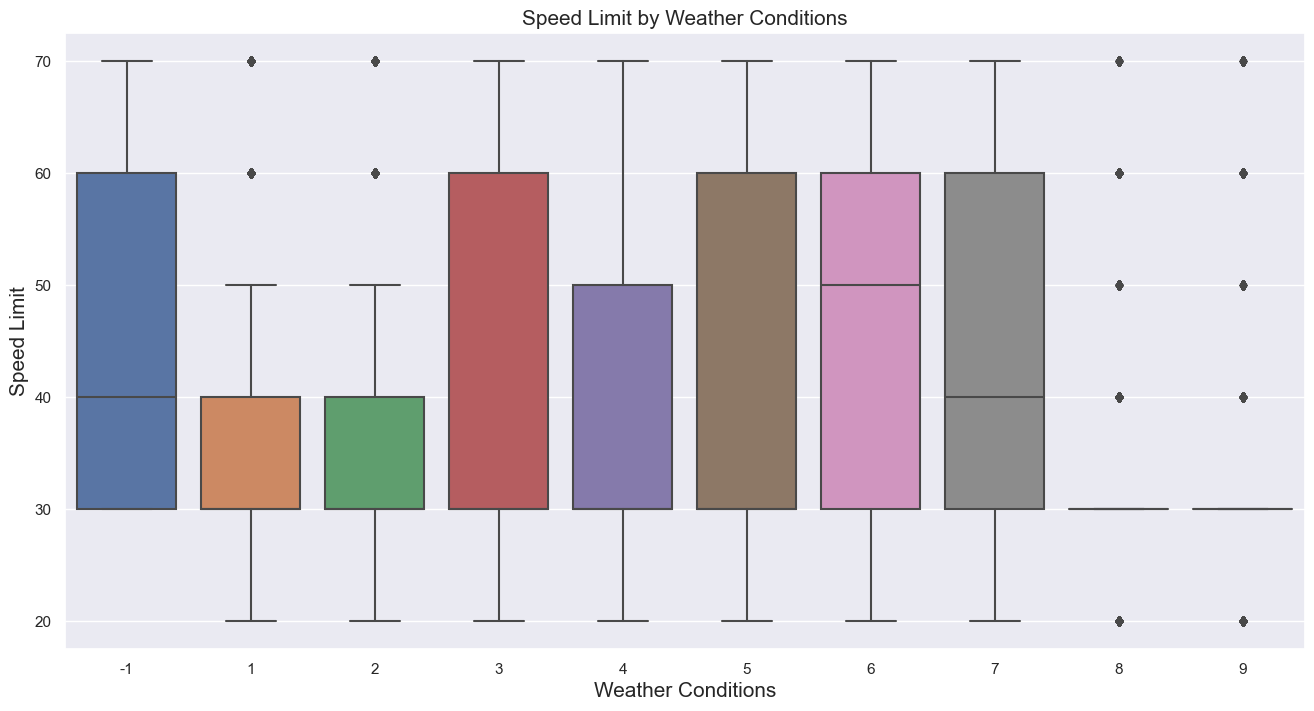

In [20]:
plt.figure(figsize = (16, 8))
sns.boxplot(x=df["weather_conditions"], y=df["speed_limit"])
plt.title("Speed Limit by Weather Conditions",fontsize = 15)
plt.xlabel("Weather Conditions",fontsize = 15)
plt.ylabel("Speed Limit",fontsize = 15)
plt.show()


### Drop the unnecessary columns:

In [21]:
df.drop(['accident_index', 'accident_reference', 'local_authority_ons_district', 'local_authority_highway','time', 'date', 'lsoa_of_accident_location','accident_year'], axis = 1, inplace = True)

### Check are there any missing values in the data frame:

In [22]:
df.isnull().any()

location_easting_osgr                           True
location_northing_osgr                          True
longitude                                       True
latitude                                        True
police_force                                   False
accident_severity                              False
number_of_vehicles                             False
number_of_casualties                           False
day_of_week                                    False
local_authority_district                       False
first_road_class                               False
first_road_number                              False
road_type                                      False
speed_limit                                    False
junction_detail                                False
junction_control                               False
second_road_class                              False
second_road_number                             False
pedestrian_crossing_human_control             

### Count the number of missing values in each column of the data frame:

In [23]:
df.isnull().sum()

location_easting_osgr                          17
location_northing_osgr                         17
longitude                                      17
latitude                                       17
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
day_of_week                                     0
local_authority_district                        0
first_road_class                                0
first_road_number                               0
road_type                                       0
speed_limit                                     0
junction_detail                                 0
junction_control                                0
second_road_class                               0
second_road_number                              0
pedestrian_crossing_human_control               0
pedestrian_crossing_physical_facilities         0


### Fill the missing values in location_easting_osgr, location_northing_osgr, longitude and latitude columns:

In [24]:
df['location_easting_osgr'] = df['location_easting_osgr'].fillna(df['location_easting_osgr'].mean())
df['location_northing_osgr'] = df['location_northing_osgr'].fillna(df['location_northing_osgr'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mode()[0])
df['latitude'] = df['latitude'].fillna(df['latitude'].mode()[0])

### Convert (1 = Satal, 2= Serious and 3 = Slight) to binary values (0 = Slight, 1 =  Serious): 
### Now we have binary classification problem

In [25]:
df['accident_severity'] = df['accident_severity'].replace([2 , 1], 0)
df['accident_severity'] = df['accident_severity'].replace(3, 1)

### Value counts of the accident_severity again:

In [26]:
df['accident_severity'].value_counts()

1    78329
0    22758
Name: accident_severity, dtype: int64

### Distribution of original data by targets


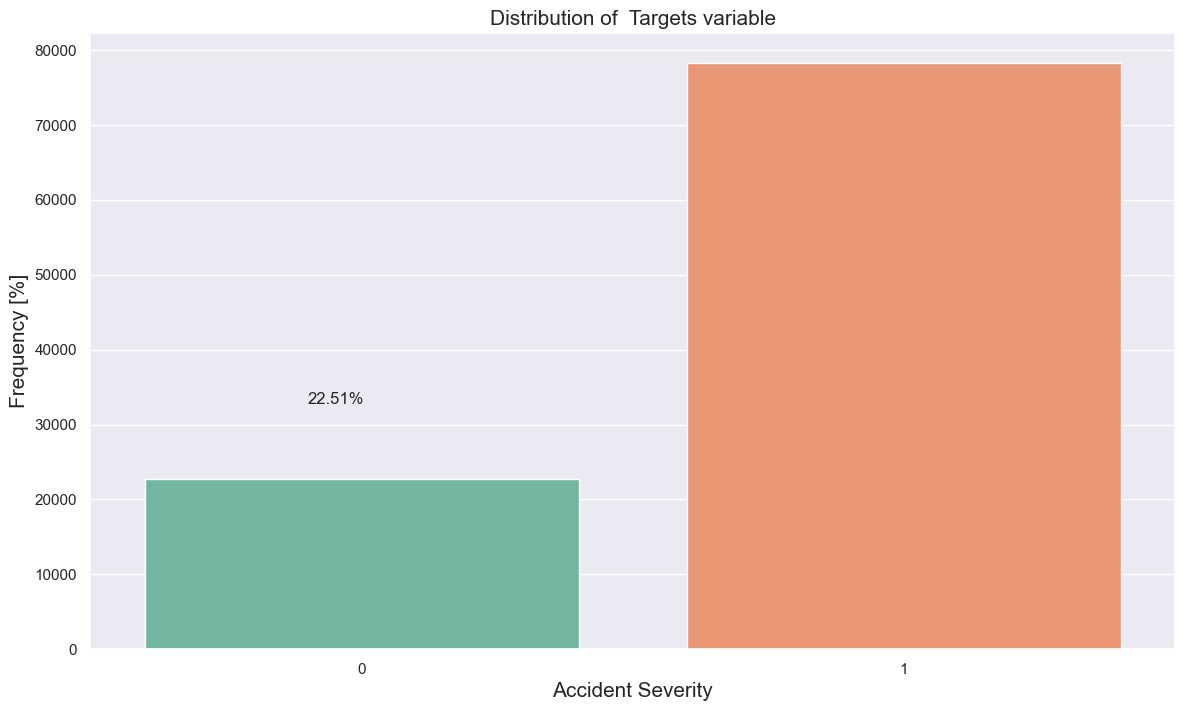

In [27]:

ax = sns.countplot(x = df.accident_severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(14,8)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.accident_severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of  Targets variable',fontsize = 15)
plt.xlabel('Accident Severity',fontsize = 15)
plt.ylabel('Frequency [%]',fontsize = 15)
plt.show()

### Store features into feature matrix X and target into vector y:

In [28]:
# Features
X = df.loc[:,df.columns != 'accident_severity']
#Target
y = df['accident_severity']

## Feature Selection using SelectKbest method:

### import SelectKBest and f_classif from sklear for feature seletion:

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Initialized SelectKBest with f_classif test and k= 15

In [30]:
test = SelectKBest(score_func=f_classif, k=15)

### Fit the SelectKBest  model:

In [31]:
fit = test.fit(X, y)

### Transform the features:

In [32]:
filtered_features= fit.transform(X)

### Show the supporting variables given by SelectKBest (True/false):

In [33]:
test.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False, False, False])

### Display the scores of the features assigned by the SelectkBest:

In [34]:
test.scores_

array([3.84971810e+02, 8.95087532e+02, 4.02284280e+02, 8.93272967e+02,
       7.97990970e+02, 5.59635947e+02, 5.34741889e+02, 3.50200756e+00,
       5.35788886e-01, 5.79057112e+00, 1.32390689e+01, 7.51023189e+01,
       8.00915704e+02, 4.16713322e+02, 4.52602180e+02, 2.40140360e+02,
       2.98832159e+01, 5.59677285e+02, 3.95078409e+02, 2.19327845e+02,
       1.63862236e+02, 6.92030265e+01, 1.76458734e+02, 1.03446956e+02,
       8.70096249e+02, 3.09693189e+03, 5.46305865e+02, 2.45257733e+00,
       5.42266011e+00, 5.26975474e+00])

### Find the Feature importance for each feature:

In [35]:
feat_importances = pd.Series(test.scores_, index=X.columns)

### Display the feature importance using a bar chart

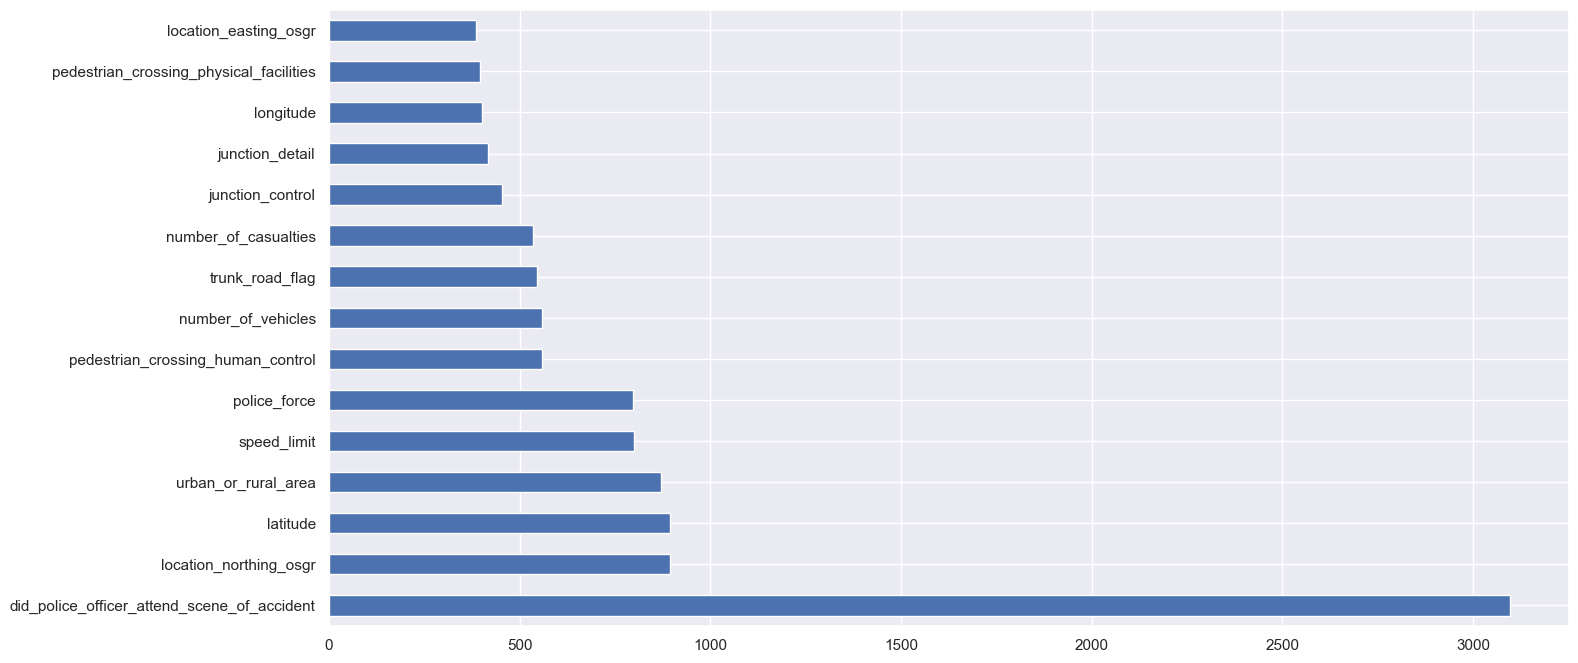

In [36]:
feat_importances.nlargest(15).plot(kind='barh',figsize = (16,8))
plt.show()

### Getting the column names:

In [37]:
column_names = X.columns[test.get_support()]
column_names

Index(['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'number_of_vehicles',
       'number_of_casualties', 'speed_limit', 'junction_detail',
       'junction_control', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'urban_or_rural_area',
       'did_police_officer_attend_scene_of_accident', 'trunk_road_flag'],
      dtype='object')

### Selecting the  relevant columns given by SelectKbest only: 

In [38]:
X_Selectkbest = X[column_names]
X_Selectkbest.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,521508.0,193079.0,-0.246102,51.623425,1,3,1,30,9,4,0,0,1,1,2
1,535379.0,180783.0,-0.050574,51.509767,1,2,3,30,7,2,0,5,1,1,2
2,529701.0,170398.0,-0.136152,51.417769,1,2,4,30,9,2,0,5,1,1,2
3,525312.0,178385.0,-0.196411,51.490536,1,1,1,30,9,4,0,4,1,1,2
4,512144.0,171526.0,-0.388169,51.431649,1,4,1,20,3,4,0,0,1,1,2


### Divide the data set into training and Testing sets (training set 80%, Testing set 20%):

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Selectkbest, y, test_size=0.20, random_state=0)  

### Use StandardScaler to scale the values of the dataset:

In [40]:
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.fit_transform(X_test)

# 	Experimental Design:

### Logistic Regression Model

In [41]:
#Initialize the LogisticRegression Model
Lg_classifier = LogisticRegression()
# Train the model on training set
Lg_classifier.fit(X_train_scaled, y_train)

LogisticRegression()

### Make prediction and evaluation on seen data:

In [42]:
# Make prediction on seen data
y_pred = Lg_classifier.predict(X_train_scaled)
#he Accuracy score for Logistic Regresson on seen data :
Lg_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Logistic Regresson on seen data : ', Lg_score_seen)

The Accuracy score for Logistic Regresson on seen data :  0.774870469524787


### Make prediction and evaluation on unseen data:

In [43]:
# Make prediction on unseen data
y_pred = Lg_classifier.predict(X_test_scaled)
#he Accuracy score for Logistic Regresson on unseen data :
Lg_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for Logistic Regresson on unseen data : ', Lg_score_unseen)


The Accuracy score for Logistic Regresson on unseen data :  0.7803442477000693


### Decision Tree Classifier Model

In [44]:
#Initialize the DecisionTreeClassifier Model
Dt_classifier = DecisionTreeClassifier()
# Train the model on training set
Dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

### Make prediction and evaluation on seen data:

In [45]:
# Make prediction on seen data
y_pred = Dt_classifier.predict(X_train_scaled)
#he Accuracy score for decision tree on seen data :
Dt_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for decision tree on seen data : ', Dt_score_seen)

The Accuracy score for decision tree on seen data :  0.9999381716108768


### Make prediction and evaluation on unseen data:

In [46]:
# Make prediction on unseen data
y_pred = Dt_classifier.predict(X_test_scaled)
#he Accuracy score for decision tree on unseen data :
Dt_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for decision tree on unseen data : ', Dt_score_unseen)


The Accuracy score for decision tree on unseen data :  0.6771688594321892


### RandomForest Classifier Model

In [47]:
#Initialize the RandomForestClassifier Model
Rf_Classifier = RandomForestClassifier(n_estimators = 100, )
# Train the model on training set
Rf_Classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

### Make prediction and evaluation on seen data:

In [48]:
# Make prediction on seen data
y_pred = Rf_Classifier.predict(X_train_scaled)
#he Accuracy score for Random Forest on seen data :
Rf_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Random Forest on seen data : ', Rf_score_seen)

The Accuracy score for Random Forest on seen data :  0.9999381716108768


### Make prediction and evaluation on unseen data:

In [49]:
# Make prediction on unseen data
y_pred = Rf_Classifier.predict(X_test_scaled)
#he Accuracy score for Random Forest on unseen data :
Rf_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for Random Forest on unseen data : ', Rf_score_unseen)


The Accuracy score for Random Forest on unseen data :  0.7588782273221881


### Gradient Boosting Classifier Model

In [50]:
#Initialize the GradientBoostingClassifier Model
Gb_Classifier = GradientBoostingClassifier()
# Train the model on training set
Gb_Classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

### Make prediction and evaluation on seen data:

In [51]:
# Make prediction on seen data
y_pred = Gb_Classifier.predict(X_train_scaled)
#he Accuracy score for Gradient Boosting on seen data :
Gb_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Gradient Boosting on seen data : ', Gb_score_seen)

The Accuracy score for Gradient Boosting on seen data :  0.7768489779767278


### Make prediction and evaluation on unseen data:

In [52]:
# Make prediction on unseen data
y_pred = Gb_Classifier.predict(X_test_scaled)
#he Accuracy score for  Gradient Boosting on unseen data :
Gb_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for  Gradient Boosting on unseen data : ', Gb_score_unseen)


The Accuracy score for  Gradient Boosting on unseen data :  0.781679691364131


### XGB Classifier Model

In [53]:
#Initialize the XGBClassifier Model
XGB_Classifier = XGBClassifier()
# Train the model on training set
XGB_Classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Make prediction and evaluation on seen data:

In [54]:
# Make prediction on seen data
y_pred = XGB_Classifier.predict(X_train_scaled)
#he Accuracy score for XGB_Classifier on seen data :
XGB_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for XGB_Classifier on seen data : ', XGB_score_seen)

The Accuracy score for XGB_Classifier on seen data :  0.7921947841570935


### Make prediction and evaluation on unseen data:

In [55]:
# Make prediction on unseen data
y_pred = XGB_Classifier.predict(X_test_scaled)
#he Accuracy score for  XGB_Classifier on unseen data :
XGB_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for XGB_Classifier on unseen data : ', XGB_score_unseen)


The Accuracy score for XGB_Classifier on unseen data :  0.7806410129587497


### KNeighbors Classifier Model

In [56]:
#Initialize the KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier()
# Train the model on KNeighborsClassifier set
KNN_Classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Make prediction and evaluation on seen data:

In [57]:
# Make prediction on seen data
y_pred = KNN_Classifier.predict(X_train_scaled)
#he Accuracy score for KNN classifier on seen data :
KNN_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for KNN_Classifier on seen data : ', KNN_score_seen)

The Accuracy score for KNN_Classifier on seen data :  0.8085793072747283


### Make prediction and evaluation on unseen data:

In [58]:
# Make prediction on unseen data
y_pred = KNN_Classifier.predict(X_test_scaled)
#he Accuracy score for  KNN classifier on unseen data :
KNN_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for KNN_Classifier on unseen data : ', KNN_score_unseen)


The Accuracy score for KNN_Classifier on unseen data :  0.7462162429518251


### Create two lists of model name and respective Accuracies:

In [59]:
scores = pd.Series([Lg_score_unseen, Dt_score_unseen, Rf_score_unseen, Gb_score_unseen, XGB_score_unseen, KNN_score_unseen,  ])
Model_Names = ['Logistic Regression','DecisionTree Classifier','RandomForest Classifier', 'GBR Classifier' ,'XGB Classifier' ,'KNN Classifier',]

### Comparision of Models  in terms  evaluation metric (accuracy Score): 

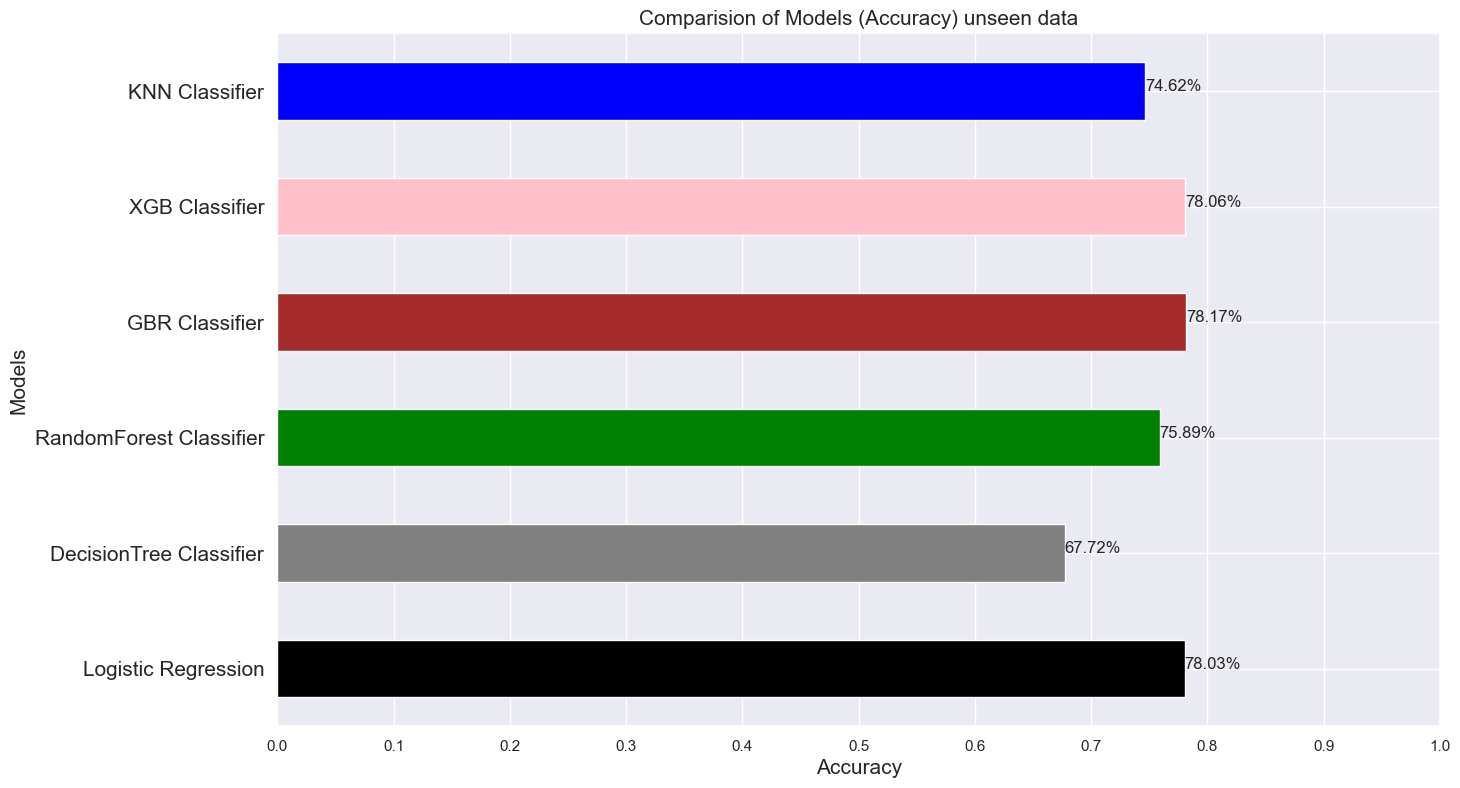

In [60]:
ax = scores.plot(kind = 'barh',figsize=(15,9),color=['black','gray','green','brown','pink','blue','red'])
ax.set_title('Comparision of Models (Accuracy) unseen data',fontsize=15)
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(Model_Names,fontsize=15,)
ax.set_ylabel("Models",fontsize=15)
ax.set_xlabel("Accuracy",fontsize=15)
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(scores)];
plt.show()

# 	Evaluation and further modelling improvements

### Hyper parameter Tuning for Highest performing Model (Logistic Regression)

In [61]:
# Create logistic regression object
lr = LogisticRegression()

# Set hyperparameters to tune
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

###  Create GridSearchCV object and fit it on training data:

In [62]:
# Create GridSearchCV object
clf = GridSearchCV(lr, hyperparameters, cv=5)

# Fit GridSearchCV object to training data
clf.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

### Print best hyperparameters and best score

In [63]:
# Print best hyperparameters and best score
print('Best parameters:', clf.best_params_)
print('Best score:', clf.best_score_)


Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.7748951929440493
